In [3]:
import time
import pandas as pd
import psycopg2
import datetime
from tqdm import trange

# row 생략 없이 출력
pd.set_option('display.max_rows', 1000)
# col 생략 없이 출력
pd.set_option('display.max_columns', 1000)

In [4]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
# %matplotlib inline 
import platform
from matplotlib import font_manager, rc # plt.rcParams['axes.unicode_minus'] = False 
if platform.system() == 'Darwin': rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
    path = "c:/Windows/Fonts/malgun.ttf" 
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name) 
else: 
    print('Unknown system... sorry~~~~')


In [5]:
# DB 연결 부분
uswer = 'dt.intern'
host = '10.80.0.234'
port = '5439'
dbname = 'fnf'
con = psycopg2.connect(dbname='fnf',host='10.80.0.234', port='5439', user = 'dt.intern', password='DTintn0926')
cur = con.cursor()


In [79]:
start = time.time()

total_stock = '''
SELECT mfs.weekkey,mfs.partkey,mfs.scskey,mfs.brand,mfs.season,mfs.partcode,mfs.color,mfs.siz,mfs.week_purch_qty,mfs.week_accept_qty,mfs.week_domestic_sale_qty,mfs.week_csm_sale_qty,mfs.purch_qty,mfs.accept_qty,mfs.takeout_qty,mfs.csm_takeout_qty,mfs.domestic_sale_qty,mfs.csm_sale_qty,mfs.stock_qty,mfs.wms_stock_qty,prdt.gender 
FROM ax.vw_f_scsweek mfs
INNER JOIN ax.vw_d_prdt prdt ON mfs.scskey  = prdt.scskey
WHERE mfs.brand = 'X' AND mfs.weekkey BETWEEN '2018-01-01' AND '2020-12-31' AND prdt.item ='SH'
'''

cur.execute(total_stock)
total_stock = cur.fetchall()

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

time : 9.33679461479187


In [80]:
total_stock = pd.DataFrame(total_stock)
total_stock.columns = ['weekkey','partkey','scskey','brand','season','partcode','color','siz','week_purch_qty','week_accept_qty','week_domestic_sale_qty','week_csm_sale_qty','purch_qty','accept_qty','takeout_qty','csm_takeout_qty','domestic_sale_qty','csm_sale_qty','stock_qty','wms_stock_qty','gender']

In [81]:
total_stock

,weekkey,partkey,scskey,brand,season,partcode,color,siz,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty,gender
0,2020-12-28,X21SDXSH0A131,X21SDXSH0A131BR240,X,21S,DXSH0A131,BR,240,0,0,0,0,0,0,0,0,0,0,0,0,X
1,2020-12-28,X21SDXSH0A131,X21SDXSH0A131BR270,X,21S,DXSH0A131,BR,270,0,0,0,0,0,0,0,0,0,0,0,0,X
2,2020-12-28,X21SDXSH0A131,X21SDXSH0A131MS230,X,21S,DXSH0A131,MS,230,0,0,0,0,0,0,0,0,0,0,0,0,X
3,2020-12-28,X21SDXSH0A131,X21SDXSH0A131WH230,X,21S,DXSH0A131,WH,230,0,0,0,0,0,0,0,0,0,0,0,0,X
4,2020-12-28,X21SDXSH0A131,X21SDXSH0A131WH250,X,21S,DXSH0A131,WH,250,0,0,0,0,0,0,0,0,0,0,0,0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309448,2020-08-24,X21SDXSHS1111,X21SDXSHS1111WH260,X,21S,DXSHS1111,WH,260,0,0,0,0,0,0,0,0,0,0,0,0,X
309449,2020-09-07,X21SDXSHS1111,X21SDXSHS1111WH260,X,21S,DXSHS1111,WH,260,0,0,0,0,0,0,0,0,0,0,0,0,X
309450,2020-09-28,X21SDXSHS1111,X21SDXSHS1111WH260,X,21S,DXSHS1111,WH,260,0,0,0,0,0,0,0,0,0,0,0,0,X
309451,2020-10-26,X21SDXSHS1111,X21SDXSHS1111WH260,X,21S,DXSHS1111,WH,260,0,0,0,0,0,0,0,0,0,0,0,0,X


In [105]:
total_stock_2018 = total_stock[ (total_stock['weekkey'] >= datetime.date(2018,1,1)) & (total_stock['weekkey'] <= datetime.date(2018,12,31)) ]
total_stock_2019 = total_stock[ (total_stock['weekkey'] >= datetime.date(2019,1,1)) & (total_stock['weekkey'] <= datetime.date(2019,12,31)) ]
total_stock_2020 = total_stock[ (total_stock['weekkey'] >= datetime.date(2020,1,1)) & (total_stock['weekkey'] <= datetime.date(2020,12,31)) ]


## 2018년 운동화

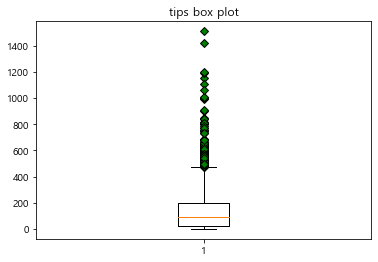

In [83]:
# 입고수량
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(total_stock_2018[total_stock_2018['week_accept_qty'] >0]['week_accept_qty'], flierprops=green_diamond)
plt.title("tips box plot")
plt.show()


In [84]:
# 입고수량
total_stock_2018[total_stock_2018['week_accept_qty']>0]['week_accept_qty'].describe()

count    2364.000000
mean      145.359983
std       168.306711
min         1.000000
25%        20.000000
50%        92.000000
75%       200.000000
max      1510.000000
Name: week_accept_qty, dtype: float64

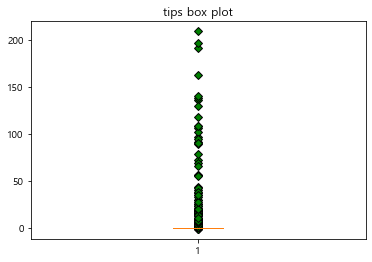

In [85]:
# 발주수량
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(total_stock_2018[total_stock_2018['week_purch_qty'] >0]['week_domestic_sale_qty'], flierprops=green_diamond)
plt.title("tips box plot")
plt.show()


In [88]:
# 주별 발주 수량
total_stock_2018[total_stock_2018['week_purch_qty']>0]['week_purch_qty'].describe()

count    1266.000000
mean      352.922591
std       316.035204
min        40.000000
25%       180.000000
50%       260.000000
75%       400.000000
max      3000.000000
Name: week_purch_qty, dtype: float64

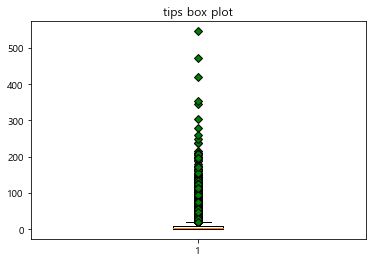

In [102]:
# 주별 판매 수량
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(total_stock_2018[total_stock_2018['week_domestic_sale_qty'] >0]['week_domestic_sale_qty'], flierprops=green_diamond)
plt.title("tips box plot")
plt.show()


In [106]:
# 주별 판매 수량
total_stock_2018[total_stock_2018['week_domestic_sale_qty']>0]['week_domestic_sale_qty'].describe()

count    16690.000000
mean         9.844158
std         19.984069
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        546.000000
Name: week_domestic_sale_qty, dtype: float64

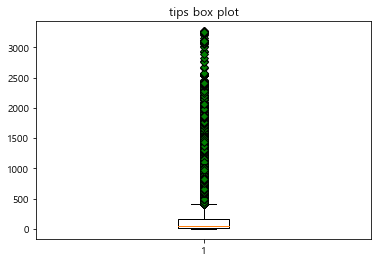

In [120]:
# 국내 판매 수량
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(total_stock_2018[total_stock_2018['domestic_sale_qty'] >0]['domestic_sale_qty'], flierprops=green_diamond)
plt.title("tips box plot")
plt.show()


In [124]:
# 국내 판매 수량
total_stock_2018[total_stock_2018['domestic_sale_qty']>0]['domestic_sale_qty'].describe()

count    26389.000000
mean       181.110046
std        365.266021
min          1.000000
25%         15.000000
50%         56.000000
75%        171.000000
max       3264.000000
Name: domestic_sale_qty, dtype: float64

In [119]:
len(total_stock_2018['partkey'].unique())

123

In [132]:
total_stock_2018['partkey'].unique()

array(['X18FDKSH62841', 'X18FDKSH64841', 'X18FDKSH69841', 'X18FDXSH03841',
       'X18FDXSH05841', 'X18FDXSH08841', 'X18FDXSH09841', 'X18FDXSH11841',
       'X18FDXSH12841', 'X18FDXSH13841', 'X18FDXSH14841', 'X18FDXSH16841',
       'X18FDXSH17841', 'X18FDXSH32841', 'X18FDXSH33841', 'X18FDXSH41841',
       'X18FDXSH42841', 'X18FDXSH43841', 'X18FDXSH44841', 'X18FDXSH70841',
       'X18SDKSH70831', 'X18SDKSH81831', 'X18SDXSH11811', 'X18SDXSH21811',
       'X18SDXSH22811', 'X18SDXSH24811', 'X18SDXSH30811', 'X18SDXSH32811',
       'X18SDXSH34811', 'X18SDXSH39811', 'X18SDXSH70831', 'X18SDXSH71831',
       'X18SDXSH73831', 'X18SDXSH74831', 'X18SDXSH75831', 'X18SDXSH76831',
       'X18SDXSH77831', 'X18SDXSH78831', 'X18SDXSH80831', 'X18SDXSH82831',
       'X18SDXSH83831', 'X19FDXSH01961', 'X19FDXSH04961', 'X18SDXSH10811',
       'X19FDXSH07961', 'X19FDXSH09961', 'X19FDXSH10941', 'X19FDXSH11961',
       'X19FDXSH12961', 'X19FDXSH13961', 'X19FDXSH14961', 'X19FDXSH70941',
       'X19FDXSH72961', '

In [140]:
# 위탁 출고 수량이 0 이 아닌 것들의 유니크 개수
len(total_stock_2018[total_stock_2018['csm_takeout_qty'] >0]['partkey'].unique())

46

In [284]:
partkey_list = total_stock_2018[total_stock_2018['accept_qty'] >0]['partkey'].unique()
partkey_list

array(['X18FDKSH64841', 'X18FDKSH69841', 'X18FDXSH03841', 'X18FDXSH05841',
       'X18FDXSH08841', 'X18FDXSH09841', 'X18FDXSH11841', 'X18FDXSH13841',
       'X18FDXSH14841', 'X18FDXSH16841', 'X18FDXSH17841', 'X18FDXSH32841',
       'X18FDXSH33841', 'X18FDXSH41841', 'X18FDXSH42841', 'X18FDXSH43841',
       'X18FDXSH44841', 'X18FDXSH70841', 'X18SDKSH70831', 'X18SDKSH81831',
       'X18SDXSH21811', 'X18SDXSH22811', 'X18SDXSH30811', 'X18SDXSH32811',
       'X18SDXSH34811', 'X18SDXSH39811', 'X18SDXSH70831', 'X18SDXSH71831',
       'X18SDXSH73831', 'X18SDXSH74831', 'X18SDXSH75831', 'X18SDXSH76831',
       'X18SDXSH77831', 'X18SDXSH78831', 'X18SDXSH80831', 'X18SDXSH82831',
       'X18SDXSH83831', 'X18SDXSH10811', 'X19SDKSH37911', 'X19SDXSH01911',
       'X19SDXSH09911', 'X19SDXSH10931', 'X19SDXSH11911', 'X19SDXSH17931',
       'X19SDXSH31911', 'X19SDXSH70931'], dtype=object)

In [285]:
len(partkey_list)

46

In [280]:
total_accept_2018 = total_stock_2018[(total_stock_2018['accept_qty'] > 0)]

In [281]:
# 위탁 판매량이 위탁 출고량을 50프로를 넘었던 상품들 출력 => 매장 당 기본 2개는 간다.
part_list = []
for i, row in total_accept_2018.iterrows() :
    if total_accept_2018.at[i,'domestic_sale_qty'] > total_accept_2018.at[i,'csm_takeout_qty'] / 2:  # (1)
#         total_refine_2018.at[i,'차이'] = 2
        part_list.append(total_accept_2018.at[i,'partkey'])

In [286]:
my_set = set(part_list) #집합set으로 변환
part_list = list(my_set) #list로 변환
print(len(part_list),part_list)

30 ['X18FDXSH32841', 'X19SDXSH70931', 'X18SDXSH74831', 'X18SDXSH10811', 'X18SDXSH73831', 'X18FDXSH14841', 'X18SDXSH83831', 'X18SDXSH82831', 'X18FDXSH03841', 'X18SDXSH75831', 'X18FDXSH43841', 'X18SDXSH32811', 'X18FDXSH11841', 'X18SDXSH22811', 'X18SDXSH76831', 'X18FDXSH44841', 'X18SDXSH30811', 'X18SDXSH80831', 'X18FDXSH33841', 'X18SDXSH70831', 'X18SDXSH77831', 'X18SDXSH34811', 'X18SDKSH70831', 'X18SDKSH81831', 'X18SDXSH78831', 'X18FDXSH70841', 'X18SDXSH39811', 'X18SDXSH21811', 'X18FDXSH17841', 'X18SDXSH71831']


In [308]:
total_refine_2018 = total_accept_2018[total_accept_2018['partkey']==part_list[1]]

In [309]:
total_refine_2018

,weekkey,partkey,scskey,brand,season,partcode,color,siz,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty,gender
138759,2018-11-19,X19SDXSH70931,X19SDXSH70931BE230,X,19S,DXSH70931,BE,230,0,0,3,3,300,290,184,184,3,3,287,106,X
138760,2018-12-10,X19SDXSH70931,X19SDXSH70931BE230,X,19S,DXSH70931,BE,230,0,0,3,3,300,290,208,208,24,24,266,82,X
138761,2018-12-31,X19SDXSH70931,X19SDXSH70931BE230,X,19S,DXSH70931,BE,230,0,0,7,7,600,298,228,227,42,42,255,70,X
138795,2018-11-19,X19SDXSH70931,X19SDXSH70931BE240,X,19S,DXSH70931,BE,240,0,0,6,6,400,390,251,251,6,6,384,139,X
138796,2018-12-10,X19SDXSH70931,X19SDXSH70931BE240,X,19S,DXSH70931,BE,240,0,0,3,3,400,400,285,285,23,23,377,115,X
138797,2018-12-31,X19SDXSH70931,X19SDXSH70931BE240,X,19S,DXSH70931,BE,240,0,0,16,16,800,403,313,313,59,59,344,90,X
138831,2018-11-19,X19SDXSH70931,X19SDXSH70931BE270,X,19S,DXSH70931,BE,270,0,0,14,14,400,400,264,264,14,14,386,136,X
138832,2018-12-10,X19SDXSH70931,X19SDXSH70931BE270,X,19S,DXSH70931,BE,270,0,0,9,9,400,400,298,298,48,48,352,102,X
138833,2018-12-31,X19SDXSH70931,X19SDXSH70931BE270,X,19S,DXSH70931,BE,270,0,0,15,15,1300,401,326,326,78,78,323,75,X
138867,2018-11-19,X19SDXSH70931,X19SDXSH70931BE290,X,19S,DXSH70931,BE,290,0,0,1,1,100,100,55,55,1,1,99,45,X


In [310]:
# 날짜별 사이즈 확인
test1 = total_refine_2018.groupby(['weekkey','siz']).sum()
test2 = test1.reset_index()

test2['ratio'] =test2['csm_sale_qty'] /test2['csm_takeout_qty']
test2

,weekkey,siz,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty,ratio
0,2018-10-29,230,0,620,0,0,2300,620,0,0,0,0,620,620,NaN
1,2018-10-29,240,0,800,0,0,3100,800,0,0,0,0,800,800,NaN
2,2018-10-29,250,0,340,0,0,2000,340,0,0,0,0,340,340,NaN
3,2018-10-29,260,0,890,0,0,2600,890,0,0,0,0,890,890,NaN
4,2018-10-29,270,0,940,0,0,3000,940,0,0,0,0,940,940,NaN
5,2018-10-29,280,0,400,0,0,1600,400,0,0,0,0,400,400,NaN
6,2018-10-29,290,0,150,0,0,400,150,0,0,0,0,150,150,NaN
7,2018-11-05,230,0,790,6,6,3100,1410,70,70,6,6,1404,1340,0.085714
8,2018-11-05,240,0,1000,8,8,4450,1800,140,140,8,8,1792,1660,0.057143
9,2018-11-05,250,0,1040,15,15,3000,1380,285,285,15,15,1365,1095,0.052632


In [311]:
test2[test2['siz']=='250']

,weekkey,siz,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty,ratio
2,2018-10-29,250,0,340,0,0,2000,340,0,0,0,0,340,340,NaN
9,2018-11-05,250,0,1040,15,15,3000,1380,285,285,15,15,1365,1095,0.052632
16,2018-11-12,250,0,1310,28,28,3900,2690,334,334,43,43,2647,2356,0.128743
23,2018-11-19,250,0,640,42,42,3900,3330,568,568,85,85,3245,2762,0.149648
30,2018-11-26,250,0,900,49,49,4300,4230,676,676,134,134,4096,3554,0.198225
37,2018-12-03,250,0,0,35,35,4300,4230,752,752,169,169,4061,3478,0.224734
44,2018-12-10,250,0,0,28,28,4300,4230,1103,1103,197,197,4033,3127,0.178604
51,2018-12-17,250,0,0,56,56,4300,4230,1197,1197,253,253,3977,3033,0.211362
58,2018-12-24,250,1600,130,63,63,5900,4360,1302,1302,316,316,4044,3058,0.242704
65,2018-12-31,250,0,0,83,83,5900,4360,1419,1419,399,399,3961,2941,0.281184


In [312]:
test2[test2['siz']=='250'][['weekkey','ratio']]

,weekkey,ratio
2,2018-10-29,NaN
9,2018-11-05,0.052632
16,2018-11-12,0.128743
23,2018-11-19,0.149648
30,2018-11-26,0.198225
37,2018-12-03,0.224734
44,2018-12-10,0.178604
51,2018-12-17,0.211362
58,2018-12-24,0.242704
65,2018-12-31,0.281184


230


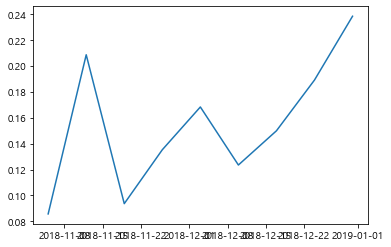

235


C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


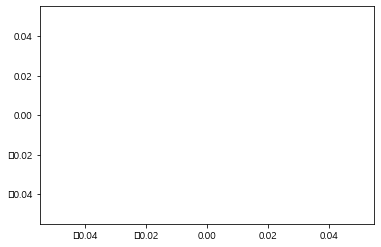

240


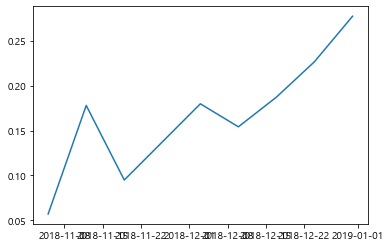

245


C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


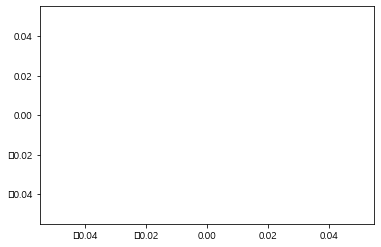

250


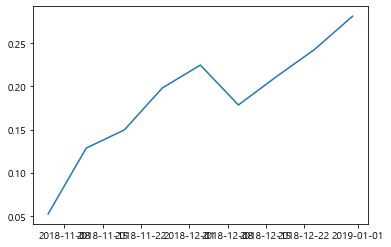

255


C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


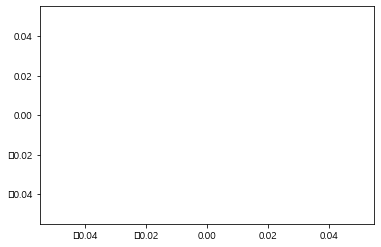

260


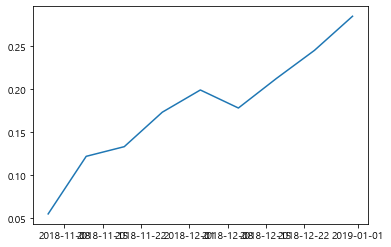

265


C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


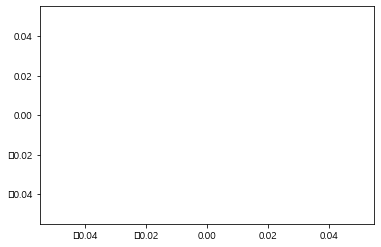

270


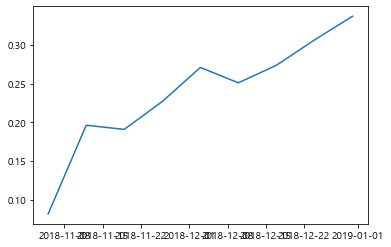

275


C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


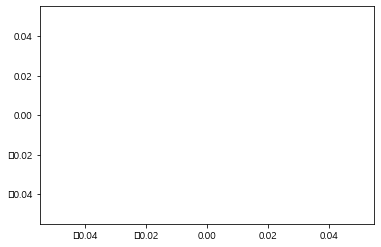

280


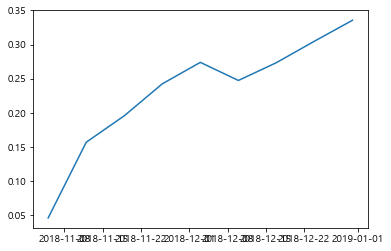

285


C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


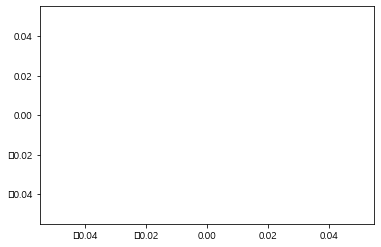

290


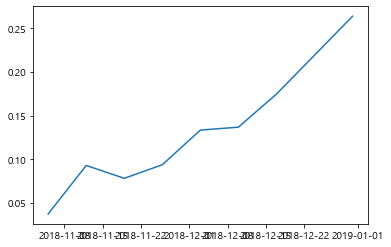

295


C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


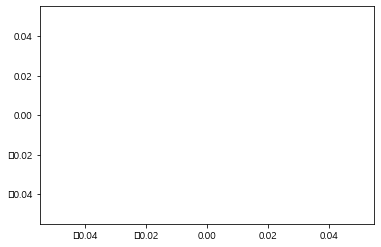

In [313]:
for i in range(230,300,5):
    print(i)
    plt.plot(test2[test2['siz']==str(i)]['weekkey'], test2[test2['siz']==str(i)]['ratio'])
    plt.show()


<AxesSubplot:>

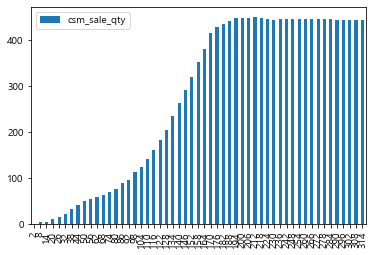

In [239]:
test2[test2['siz']=='250'][['weekkey','csm_sale_qty']].sort_values(by='weekkey').plot(kind='bar')


In [233]:
# 날짜별 컬러 확인
test1 = total_refine_2018.groupby(['weekkey','color']).sum()
test2 = test1.reset_index()
test2
# test2[test2['color']=='BK']

,weekkey,color,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty
0,2018-01-01,BK,1500,1464,4,4,1500,1464,1033,1033,4,4,1460,431
1,2018-01-01,KA,1000,938,1,1,1000,938,434,434,1,1,937,504
2,2018-01-01,LG,1100,1090,0,0,1100,1090,743,743,0,0,1090,347
3,2018-01-01,MS,900,880,0,0,900,880,716,716,0,0,880,164
4,2018-01-08,BK,0,0,16,16,1500,1464,1043,1043,20,20,1444,421
5,2018-01-08,KA,0,0,2,2,1000,938,439,439,3,3,935,499
6,2018-01-08,LG,0,0,1,1,1100,1090,744,744,1,1,1089,346
7,2018-01-08,MS,0,0,2,2,900,880,717,717,2,2,878,163
8,2018-01-15,BK,0,0,6,6,1500,1464,1064,1064,26,26,1438,400
9,2018-01-15,KA,0,0,0,0,1000,938,440,440,3,3,935,498


In [235]:
test2[test2['color']=='BK']

,weekkey,color,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty
0,2018-01-01,BK,1500,1464,4,4,1500,1464,1033,1033,4,4,1460,431
4,2018-01-08,BK,0,0,16,16,1500,1464,1043,1043,20,20,1444,421
8,2018-01-15,BK,0,0,6,6,1500,1464,1064,1064,26,26,1438,400
12,2018-01-22,BK,0,0,13,13,1500,1464,1078,1078,39,39,1425,386
16,2018-01-29,BK,0,29,12,12,1500,1493,1113,1113,51,51,1442,380
20,2018-02-05,BK,0,0,20,20,1500,1493,1162,1162,71,71,1422,331
24,2018-02-12,BK,0,0,26,26,1500,1493,1172,1172,97,97,1396,321
28,2018-02-19,BK,0,0,34,34,1500,1493,1221,1221,131,131,1362,272
32,2018-02-26,BK,0,0,35,35,1500,1493,1254,1254,166,166,1327,239
36,2018-03-05,BK,0,0,29,29,1500,1493,1299,1299,195,195,1298,194


<AxesSubplot:>

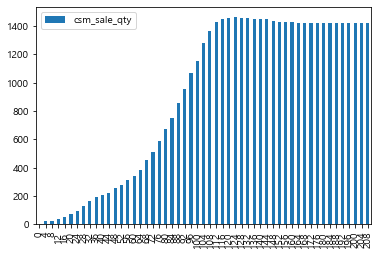

In [236]:
test2[test2['color']=='BK'][['weekkey','csm_sale_qty']].sort_values(by='weekkey').plot(kind='bar')

In [260]:
len(part_list)

30

In [259]:
# 각각의 상품에 따른 날짜별 사이즈 
total_refine_2018 = total_accept_2018[total_accept_2018['partkey']==part_list[0]]

# 날짜별 사이즈 확인
test1 = total_refine_2018.groupby(['weekkey','siz']).sum()
test2 = test1.reset_index()

test2['ratio'] =test2['csm_sale_qty'] /test2['csm_takeout_qty']
test2

# for i in range(230,300,5):
#     print(i)
#     plt.plot(test2[test2['siz']==str(i)]['weekkey'], test2[test2['siz']==str(i)]['ratio'])
#     plt.show()


,weekkey,siz,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty,ratio
0,2018-01-01,230,630,613,2,2,630,613,411,411,2,2,611,202,0.004866
1,2018-01-01,240,890,878,0,0,890,878,592,592,0,0,878,286,0.000000
2,2018-01-01,250,700,674,0,0,700,674,499,499,0,0,674,175,0.000000
3,2018-01-01,260,910,898,3,3,910,898,611,611,3,3,895,287,0.004910
4,2018-01-01,270,970,945,-1,-1,970,945,592,592,-1,-1,946,353,-0.001689
5,2018-01-01,280,400,364,1,1,400,364,221,221,1,1,363,143,0.004525
6,2018-01-08,230,0,0,2,2,630,613,415,415,4,4,609,198,0.009639
7,2018-01-08,240,0,0,5,5,890,878,594,594,5,5,873,284,0.008418
8,2018-01-08,250,0,0,4,4,700,674,503,503,4,4,670,171,0.007952
9,2018-01-08,260,0,0,9,9,910,898,617,617,12,12,886,281,0.019449


In [292]:
total_refine_2018 = total_accept_2018[total_accept_2018['partkey'].isin(part_list)]
# 날짜별 사이즈 확인
test1 = total_refine_2018.groupby(['weekkey','partkey','siz']).sum()
test2 = test1.reset_index()

test2['ratio'] =test2['csm_sale_qty'] /test2['csm_takeout_qty']
test2

,weekkey,partkey,siz,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty,ratio
0,2018-01-01,X18SDXSH70831,230,0,0,16,16,0,750,750,750,16,16,734,0,0.021333
1,2018-01-01,X18SDXSH70831,240,0,0,26,26,0,880,880,880,26,26,854,0,0.029545
2,2018-01-01,X18SDXSH70831,250,0,0,15,15,0,470,470,470,15,15,455,0,0.031915
3,2018-01-01,X18SDXSH70831,260,0,0,32,32,0,940,940,940,32,32,908,0,0.034043
4,2018-01-01,X18SDXSH70831,270,0,0,28,28,0,780,780,780,28,28,752,0,0.035897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,2018-12-31,X19SDXSH70931,250,0,0,83,83,5900,4360,1419,1419,399,399,3961,2941,0.281184
7526,2018-12-31,X19SDXSH70931,260,0,0,144,144,9900,5142,2625,2625,748,748,4394,2517,0.284952
7527,2018-12-31,X19SDXSH70931,270,0,0,163,163,13250,5812,3357,3357,1132,1132,4680,2455,0.337206
7528,2018-12-31,X19SDXSH70931,280,0,0,98,98,8150,2959,2043,2044,686,686,2274,916,0.335616


In [305]:
test2[(test2['partkey']=='X18SDXSH70831')& (test2['siz']=='230')]

,weekkey,partkey,siz,week_purch_qty,week_accept_qty,week_domestic_sale_qty,week_csm_sale_qty,purch_qty,accept_qty,takeout_qty,csm_takeout_qty,domestic_sale_qty,csm_sale_qty,stock_qty,wms_stock_qty,ratio
0,2018-01-01,X18SDXSH70831,230,0,0,16,16,0,750,750,750,16,16,734,0,0.021333
20,2018-01-08,X18SDXSH70831,230,4830,1281,44,44,4830,2031,1585,1585,60,60,1971,446,0.037855
46,2018-01-15,X18SDXSH70831,230,0,0,70,70,4830,2031,1662,1662,130,130,1901,369,0.078219
72,2018-01-22,X18SDXSH70831,230,0,0,180,180,4830,2031,1858,1860,310,310,1723,173,0.166667
115,2018-01-29,X18SDXSH70831,230,0,401,232,232,4830,2432,2014,2016,542,542,1892,418,0.268849
164,2018-02-05,X18SDXSH70831,230,0,0,243,243,4830,2432,2338,2340,785,785,1649,94,0.335470
231,2018-02-12,X18SDXSH70831,230,0,1930,387,387,4830,4362,2755,2757,1172,1172,3192,1607,0.425100
298,2018-02-19,X18SDXSH70831,230,0,536,755,755,4830,4898,3903,3905,1927,1927,2973,995,0.493470
365,2018-02-26,X18SDXSH70831,230,0,0,1212,1212,4830,4898,4800,4802,3139,3139,1761,98,0.653686
442,2018-03-05,X18SDXSH70831,230,3850,0,345,345,8680,4898,4893,4892,3484,3484,1413,5,0.712183


In [314]:
test2[(test2['partkey']=='X18SDXSH70831')]['siz'].unique()

KeyError: 'partkey'